# Stack Exchange API


The goal of this project is to provide valuable insightson the most popular programming languages and emerging technological trends..

In [3]:
# Import the needed python libraries

import requests # for making HTTP requests
import json # parse JSON strings into Python dictionaries
import pandas as pd # data structures and functions needed to manipulate structured data
import time # built-in time module
from datetime import datetime # for working with dates and times
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt # interface for making plots and charts
import matplotlib.ticker as ticker # to set the x-ticks to only full years and format them as integers.
from bs4 import BeautifulSoup # for parsing HTML and XML documents


We'll conduct an analysis by comparing trends derived from tags extracted from the Stack Exchange API with data collected from Stack Overflow's annual user survey. This approach will provide a comprehensive view of programming language and technology trends, blending real-time usage data with insights gathered directly from the developer community.

In [4]:
# Define the API key and the base URL
key = 'AKiH7n8wj*RFCMRwkDCVOQ(('
url = 'https://api.stackexchange.com/2.3/questions'

# Define the request parameters
params = {
    'order': 'desc',
    'sort': 'activity',
    'site': 'stackoverflow',
    'key': key,
    'pagesize': 1  # Only request 1 item for the test
}

# Send a GET request to the API
response = requests.get(url, params=params)

# Check the status code of the response
if response.status_code == 200:
    print('Successfully connected to the API with the key.')
else:
    print(f'Failed to connect to the API with the key. Status code: {response.status_code}')

Successfully connected to the API with the key.


The Stack Exchange API indeed has limitations on the number of results returned per request, and it doesn't provide a direct way to get the total count of questions for a specific tag within a specific date range.

However we can use the total field in the wrapper object to get an approximate count of the total number of questions that meet your criteria. This field provides an estimate rather than an exact count, and it's available when you set the filter parameter to total.

In [5]:
# Define the list of languages
languages_api = ["JavaScript", "HTML", "Python", "SQL", "TypeScript", "Java", "C#", "C++", "C", "PHP"]

# Define the list of years
years = list(range(2019, 2024))

# Define the API endpoint
questions_url = 'https://api.stackexchange.com/2.2/questions'

# Initialize a list to store the results
results = []

# Get the number of questions for each year and each language
for language in languages_api:
    # Initialize a dictionary to store the number of questions by year
    questions_by_year = {}

    for year in years:
        # Define the parameters for the GET request
        params = {
            'key': key,
            'tagged': language,
            'site': 'stackoverflow',
            'fromdate': int(time.mktime(time.strptime(f'{year}-01-01', '%Y-%m-%d'))),
            'todate': int(time.mktime(time.strptime(f'{year}-12-31', '%Y-%m-%d'))),
            'pagesize': 1,
            'page': 1,
            'filter': 'total'
        }

        # Send a GET request to the API
        response = requests.get(questions_url, params=params)

        # Parse the JSON response
        data = response.json()

        # Check if the 'total' field is in the response
        if 'total' in data:
            # Add the total number of questions to the dictionary
            questions_by_year[year] = data['total']
        else:
            print(f'No questions returned for {language} in {year}. Check the request parameters and API key.')

    # Add the result for this language to the results list
    results.append({
        'language': language,
        'questions_by_year': questions_by_year
    })

# Print the number of questions by year for each language
for result in results:
    print(f"{result['language']}:")
    for year, count in result['questions_by_year'].items():
        print(f'  {year}: {count} questions')

JavaScript:
  2019: 187656 questions
  2020: 213307 questions
  2021: 179324 questions
  2022: 151421 questions
  2023: 84685 questions
HTML:
  2019: 76005 questions
  2020: 83311 questions
  2021: 68606 questions
  2022: 55780 questions
  2023: 32691 questions
Python:
  2019: 223239 questions
  2020: 283784 questions
  2021: 251499 questions
  2022: 225968 questions
  2023: 128816 questions
SQL:
  2019: 49242 questions
  2020: 52095 questions
  2021: 43263 questions
  2022: 37222 questions
  2023: 19733 questions
TypeScript:
  2019: 28981 questions
  2020: 33791 questions
  2021: 33112 questions
  2022: 34411 questions
  2023: 26050 questions
Java:
  2019: 125505 questions
  2020: 119925 questions
  2021: 87438 questions
  2022: 68917 questions
  2023: 45880 questions
C#:
  2019: 99026 questions
  2020: 87256 questions
  2021: 66891 questions
  2022: 62617 questions
  2023: 43570 questions
C++:
  2019: 49102 questions
  2020: 57900 questions
  2021: 45719 questions
  2022: 37669 quest

# Emerging Languages

We did the same process with newer languages to test if the results are similar

In [4]:
# Define the list of languages
languages_api_2 = ["Rust", "Solidity", "Go", "Golang", "Elixir", "Dart", "Julia", "Zig"]

# Define the list of years
years = list(range(2019, 2024))

# Define the API endpoint
questions_url = 'https://api.stackexchange.com/2.2/questions'

# Initialize a list to store the results
results_2 = []

# Get the number of questions for each year and each language
for language in languages_api_2:
    # Initialize a dictionary to store the number of questions by year
    questions_by_year = {}

    for year in years:
        # Define the parameters for the GET request
        params = {
            'key': key,
            'tagged': language,
            'site': 'stackoverflow',
            'fromdate': int(time.mktime(time.strptime(f'{year}-01-01', '%Y-%m-%d'))),
            'todate': int(time.mktime(time.strptime(f'{year}-12-31', '%Y-%m-%d'))),
            'pagesize': 1,
            'page': 1,
            'filter': 'total'
        }

        # Send a GET request to the API
        response = requests.get(questions_url, params=params)

        # Parse the JSON response
        data = response.json()

        # Check if the 'total' field is in the response
        if 'total' in data:
            # Add the total number of questions to the dictionary
            questions_by_year[year] = data['total']
        else:
            print(f'No questions returned for {language} in {year}. Check the request parameters and API key.')

    # Add the result for this language to the results list
    results_2.append({
        'language': language,
        'questions_by_year': questions_by_year
    })

# Print the number of questions by year for each language
for result in results_2:
    print(f"{result['language']}:")
    for year, count in result['questions_by_year'].items():
        print(f'  {year}: {count} questions')

Rust:
  2019: 3582 questions
  2020: 5054 questions
  2021: 5972 questions
  2022: 7649 questions
  2023: 6571 questions
Solidity:
  2019: 436 questions
  2020: 348 questions
  2021: 1493 questions
  2022: 2491 questions
  2023: 793 questions
Go:
  2019: 7554 questions
  2020: 7919 questions
  2021: 7775 questions
  2022: 8406 questions
  2023: 5914 questions
Golang:
  2019: 7553 questions
  2020: 7920 questions
  2021: 7774 questions
  2022: 8415 questions
  2023: 5913 questions
Elixir:
  2019: 957 questions
  2020: 706 questions
  2021: 595 questions
  2022: 507 questions
  2023: 306 questions
Dart:
  2019: 10669 questions
  2020: 17710 questions
  2021: 19204 questions
  2022: 20742 questions
  2023: 12119 questions
Julia:
  2019: 1374 questions
  2020: 1702 questions
  2021: 1899 questions
  2022: 1629 questions
  2023: 1077 questions
Zig:
  2019: 5 questions
  2020: 27 questions
  2021: 40 questions
  2022: 55 questions
  2023: 167 questions


# API Data Collection:

First, you need to convert your results into a DataFrame that matches the structure expected by the seaborn lineplot function. The DataFrame should have columns for 'Year', 'Questions', and 'Language'

In [7]:
# Initialize a list to store the data
data = []

# Loop over the results
for result in results:
    for year, count in result['questions_by_year'].items():
        # Append a dictionary to the list
        data.append({
            'Year': year,
            'Questions': count,
            'Language': result['language']
        })

# Convert the list to a DataFrame
dfsurvey = pd.DataFrame(data)

In [8]:
print (dfsurvey)

    Year  Questions    Language
0   2019     187656  JavaScript
1   2020     213307  JavaScript
2   2021     179324  JavaScript
3   2022     151421  JavaScript
4   2023      84685  JavaScript
5   2019      76005        HTML
6   2020      83311        HTML
7   2021      68606        HTML
8   2022      55780        HTML
9   2023      32691        HTML
10  2019     223239      Python
11  2020     283784      Python
12  2021     251499      Python
13  2022     225968      Python
14  2023     128816      Python
15  2019      49242         SQL
16  2020      52095         SQL
17  2021      43263         SQL
18  2022      37222         SQL
19  2023      19733         SQL
20  2019      28981  TypeScript
21  2020      33791  TypeScript
22  2021      33112  TypeScript
23  2022      34411  TypeScript
24  2023      26050  TypeScript
25  2019     125505        Java
26  2020     119925        Java
27  2021      87438        Java
28  2022      68917        Java
29  2023      45880        Java
30  2019

With the data collected from the API we create a graphic with time by years in the x axis and the volume of questions by language in the y axis.

C:\Users\lluis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lluis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


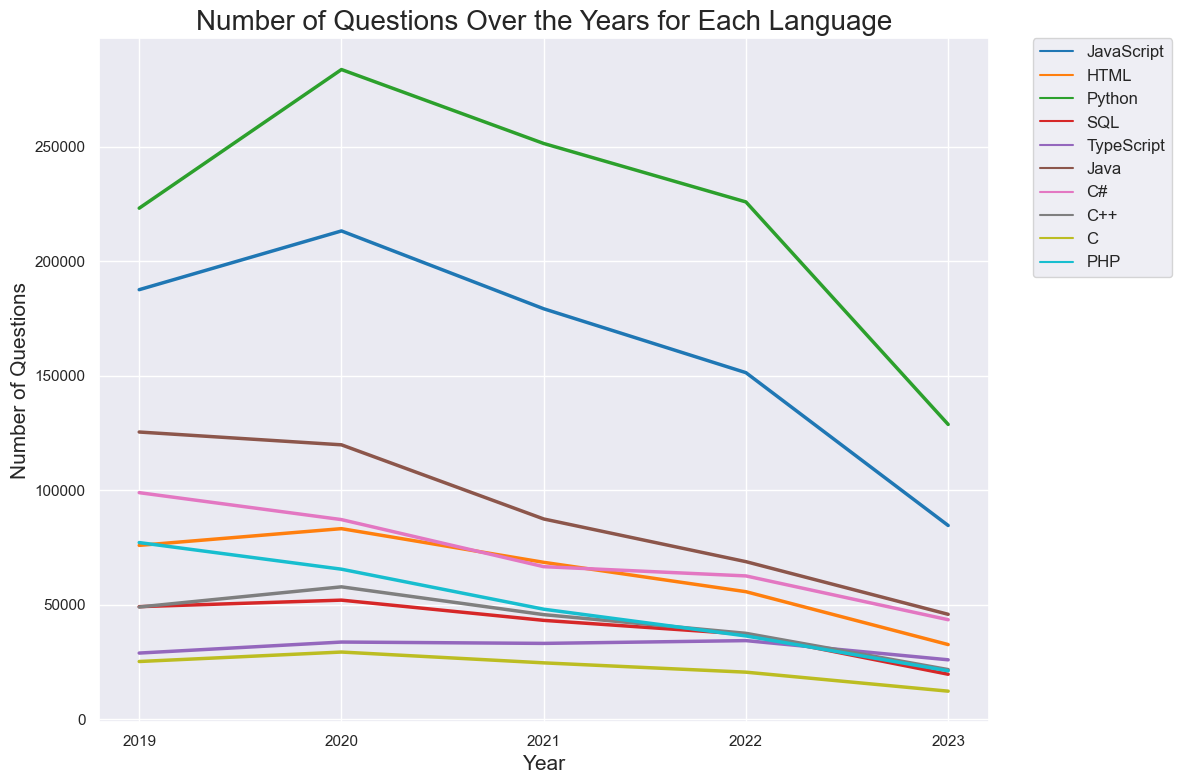

In [6]:
# Set seaborn theme
sns.set_theme(style="darkgrid")

# Create a line plot with Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=dfsurvey, x='Year', y='Questions', hue='Language', palette='tab10', linewidth=2.5)

# Add title and labels with larger fonts
plt.title('Number of Questions Over the Years for Each Language', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Questions', fontsize=15)

# Set xticks to whole years
plt.xticks(range(dfsurvey['Year'].min(), dfsurvey['Year'].max() + 1, 1))

# Increase the size of the legend and move it outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()